# 5장 선형 회귀

* "부록3 매트플롯립 입문"에서 한글 폰트를 올바르게 출력하기 위한 설치 방법을 설명했다. 설치 방법은 다음과 같다.

In [1]:
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 4.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/opentype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/opentype/font-awesome: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/opentype/mathjax: caching, new cache contents: 24 fonts, 0 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 5 dirs
/usr/share/fonts/truetype/font-awesome: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/glyphico

In [2]:
# 필요 라이브러리 설치

!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

* 모든 설치가 끝나면 한글 폰트를 바르게 출력하기 위해 **[런타임]** -> **[런타임 다시시작]**을 클릭한 다음, 아래 셀부터 코드를 실행해 주십시오.

In [3]:
# 라이브러리 임포트

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchviz import make_dot

In [5]:
# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

## 5.3 선형 함수(nn.Linear)

###  입력 :1 출력 :1인 선형 함수

In [6]:
# 난수 시드값 고정
torch.manual_seed(123)

# 입력 :1 출력 :1 선형 함수의 정의
l1 = nn.Linear(1, 1)

# 선형 함수 확인
print(l1)

Linear(in_features=1, out_features=1, bias=True)


In [7]:
# 파라미터명, 파라미터 값, shape 표시

for param in l1.named_parameters():
    print('name: ', param[0])
    print('tensor: ', param[1])
    print('shape: ', param[1].shape)

name:  weight
tensor:  Parameter containing:
tensor([[-0.4078]], requires_grad=True)
shape:  torch.Size([1, 1])
name:  bias
tensor:  Parameter containing:
tensor([0.0331], requires_grad=True)
shape:  torch.Size([1])


In [8]:
# 초깃값 설정
nn.init.constant_(l1.weight, 2.0)
nn.init.constant_(l1.bias, 1.0)

# 결과 확인
print(l1.weight)
print(l1.bias)

Parameter containing:
tensor([[2.]], requires_grad=True)
Parameter containing:
tensor([1.], requires_grad=True)


In [9]:
# 테스트용 데이터 생성

# x_np를 넘파이 배열로 정의
x_np = np.arange(-2, 2.1, 1)

# 텐서 변수화
x = torch.tensor(x_np).float()

# (N,1) 사이즈로 변경
x = x.view(-1,1)

# 결과 확인
print(x.shape)
print(x)

torch.Size([5, 1])
tensor([[-2.],
        [-1.],
        [ 0.],
        [ 1.],
        [ 2.]])


In [10]:
# 1차 함수 테스트

y = l1(x)

print(y.shape)
print(y.data)

torch.Size([5, 1])
tensor([[-3.],
        [-1.],
        [ 1.],
        [ 3.],
        [ 5.]])


### 입력 :2 출력 :1인 선형 함수

In [11]:
# 입력 :2, 출력:1 선형 함수 정의
l2 = nn.Linear(2, 1)

# 초깃값 설정
nn.init.constant_(l2.weight, 1.0)
nn.init.constant_(l2.bias, 2.0)

# 결과 확인
print(l2.weight)
print(l2.bias)

Parameter containing:
tensor([[1., 1.]], requires_grad=True)
Parameter containing:
tensor([2.], requires_grad=True)


In [12]:
# 2차원 넘파이 배열
x2_np = np.array([[0, 0], [0, 1], [1, 0], [1,1]])

# 텐서 변수화
x2 =  torch.tensor(x2_np).float()

# 결과 확인
print(x2.shape)
print(x2)

torch.Size([4, 2])
tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [13]:
# 함수 값 계산
y2 = l2(x2)

# shape 확인
print(y2.shape)

# 값 확인
print(y2.data)

torch.Size([4, 1])
tensor([[2.],
        [3.],
        [3.],
        [4.]])


### 입력 :2 출력:3인 선형 함수

In [14]:
# 입력 :2, 출력 :3 선형 함수 정의

l3 = nn.Linear(2, 3)

# 초깃값 설정
nn.init.constant_(l3.weight[0,:], 1.0)
nn.init.constant_(l3.weight[1,:], 2.0)
nn.init.constant_(l3.weight[2,:], 3.0)
nn.init.constant_(l3.bias, 2.0)

# 결과 확인
print(l3.weight)
print(l3.bias)

Parameter containing:
tensor([[1., 1.],
        [2., 2.],
        [3., 3.]], requires_grad=True)
Parameter containing:
tensor([2., 2., 2.], requires_grad=True)


In [15]:
# 함수 값 계산
y3 = l3(x2)

# shape 확인
print(y3.shape)

# 값 확인
print(y3.data)

torch.Size([4, 3])
tensor([[2., 2., 2.],
        [3., 4., 5.],
        [3., 4., 5.],
        [4., 6., 8.]])


## 5.4 커스텀 클래스를 이용한 모델 정의

In [16]:
# 모델 정의

class Net(nn.Module):
    def __init__(self, n_input, n_output):
        #  부모 클래스 nn.Module 초기화
        super().__init__()

        # 출력층 정의
        self.l1 = nn.Linear(n_input, n_output)

    # 예측 함수 정의
    def forward(self, x):
        x1 = self.l1(x) # 선형 회귀
        return x1

In [17]:
# 더미 입력
inputs = torch.ones(100,1)

# 인스턴스 생성(１ 입력, 1 출력 선형 모델)
n_input = 1
n_output = 1
net = Net(n_input, n_output)

# 예측
outputs = net(inputs)


## 5.6 데이터 준비
UCI 공개 데이터셋 중에서 회귀 문제에 자주 사용되는 '보스턴 데이터셋'을 사용한다.

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

원본 데이터셋은, 17개 항목의 입력값으로부터 부동산 가격을 예측하기 위함이지만, 가장 단순한 '단일 회귀 모델'(1입력)을 만든다면 이 항목중에서 ``RM``이라는 항목만을 추출한다.


In [18]:
# 학습용 데이터셋 준비

# '보스턴 데이터셋'은 현재 사이킷런 라이브러리에서 가져올 수 있지만,
# 사이킷런에서 앞으로 이 데이터를 사용할 수 없기 때문에 웹 url에서 직접 수집

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+",
                     skiprows=22, header=None)
x_org = np.hstack([raw_df.values[::2, :],
                   raw_df.values[1::2, :2]])
yt = raw_df.values[1::2, 2]
feature_names = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
                          'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT'])

# 결과 확인
print('원본 데이터', x_org.shape, yt.shape)
print('항목명: ', feature_names)

원본 데이터 (506, 13) (506,)
항목명:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [19]:
# 데이터 추출(RM 항목)
x = x_org[:,feature_names == 'RM']
print('추출 후', x.shape)
print(x[:5,:])

# 정답 데이터 y 표시
print('정답 데이터')
print(yt[:5])

추출 후 (506, 1)
[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]]
정답 데이터
[24.  21.6 34.7 33.4 36.2]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

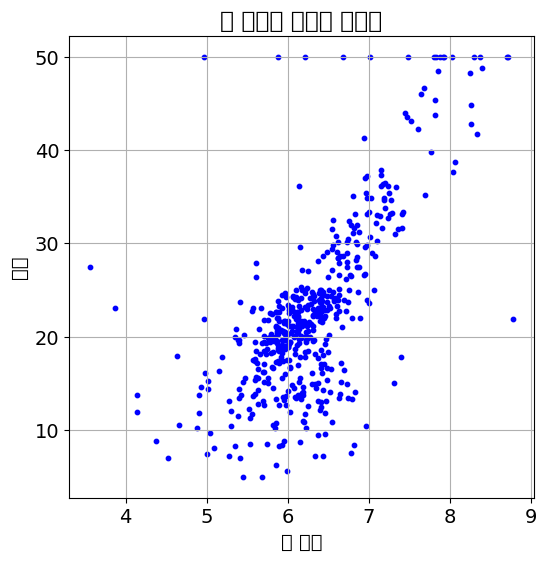

In [20]:
# 산포도 출력

plt.scatter(x, yt, s=10, c='b')
plt.xlabel('방 개수')
plt.ylabel('가격')
plt.title('방 개수와 가격의 산포도')
plt.show()

## 5.7 모델 정의

In [21]:
# 변수 정의

# 입력 차원수
n_input= x.shape[1]

# 출력 차원수
n_output = 1

print(f'입력 차원수: {n_input}  출력 차원수: {n_output}')

입력 차원수: 1  출력 차원수: 1


In [22]:
# 머신러닝 모델(예측 모델)의 클래스 정의

class Net(nn.Module):
    def __init__(self, n_input, n_output):
        #  부모 클래스 nn.Module 초기화
        super().__init__()

        # 출력층 정의
        self.l1 = nn.Linear(n_input, n_output)

        # 초깃값을 모두 1로 설정
        # "딥러닝을 위한 수학"과 조건을 맞추기 위함
        nn.init.constant_(self.l1.weight, 1.0)
        nn.init.constant_(self.l1.bias, 1.0)

    # 예측 함수 정의
    def forward(self, x):
        x1 = self.l1(x) # 선형 회귀
        return x1

In [23]:
# 인스턴스 생성
# １입력 1출력 선형 모델

net = Net(n_input, n_output)

In [24]:
# 모델 안의 파라미터를 확인
# 모델 안의 변수를 가져오기 위해 named_parameters 함수를 사용함
# 첫번째 요소는 변수명, 두번째 요소가 변숫값
#
# predict.weight와 predict.bias 파라미터가 존재함
# 초깃값은 두 파라미터 모두 1.0

for parameter in net.named_parameters():
    print(f'변수명: {parameter[0]}')
    print(f'변숫값: {parameter[1].data}')

변수명: l1.weight
변숫값: tensor([[1.]])
변수명: l1.bias
변숫값: tensor([1.])


In [25]:
# 파라미터 리스트를 가져오기 위해 parameters 함수를 사용

for parameter in net.parameters():
    print(parameter)

Parameter containing:
tensor([[1.]], requires_grad=True)
Parameter containing:
tensor([1.], requires_grad=True)


### 모델 확인

In [26]:
# 모델의 개요 표시 1

print(net)

Net(
  (l1): Linear(in_features=1, out_features=1, bias=True)
)


In [27]:
# 모델의 개요 표시 1

from torchinfo import summary
summary(net, (1,))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1]                       --
├─Linear: 1-1                            [1]                       2
Total params: 2
Trainable params: 2
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

### 손실 함수와 최적화 함수

In [28]:
# 손실 함수： 평균 제곱 오차
criterion = nn.MSELoss()

# 학습률
lr = 0.01

# 최적화 함수: 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

## 5.8 경사 하강법

In [29]:
# 입력값 x와 정답 yt의 텐서 변수화

inputs = torch.tensor(x).float()
labels = torch.tensor(yt).float()

# 차원 수 확인

print(inputs.shape)
print(labels.shape)

torch.Size([506, 1])
torch.Size([506])


In [30]:
# 손실 계산을 위해 labels를 (N,1) 차원의 행렬로 변환

labels1 = labels.view((-1, 1))

# 차원 수 확인
print(labels1.shape)

torch.Size([506, 1])


In [31]:
# 예측 계산

outputs = net(inputs)

In [32]:

# 손실 계산
loss = criterion(outputs, labels1)

# 손실 값 가져오기
print(f'{loss.item():.5f}')

308.44986


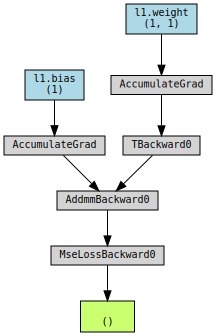

In [33]:
# 손실을 그래프로 나타내기

g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

In [34]:
# 예측 계산
outputs = net(inputs)

# 손실 계산
loss = criterion(outputs, labels1)

# 경사 계산
loss.backward()

# 경사 계산 결과를 취득 가능하도록 함
print(net.l1.weight.grad)
print(net.l1.bias.grad)

tensor([[-199.6421]])
tensor([-30.4963])


In [35]:
# 파라미터 수정
optimizer.step()

# 파라미터 확인
print(net.l1.weight)
print(net.l1.bias)

Parameter containing:
tensor([[2.9964]], requires_grad=True)
Parameter containing:
tensor([1.3050], requires_grad=True)


In [36]:
# 경삿값 초기화
optimizer.zero_grad()

# 경삿값을 모두 0으로 함
print(net.l1.weight.grad)
print(net.l1.bias.grad)

None
None


### 반복 계산

In [37]:
# 학습률
lr = 0.01

# 인스턴스 생성(파라미터 값 초기화)
net = Net(n_input, n_output)

# 손실 함수：평균 제곱 오차
criterion = nn.MSELoss()

# 최적화 함수 : 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

# 반복 횟수
num_epochs = 50000

# 평가 결과 기록(손실 값만 기록)
history = np.zeros((0,2))

In [38]:
# 반복 계산 메인 루프

for epoch in range(num_epochs):

    # 경삿값 초기화
    optimizer.zero_grad()

    # 예측 계산
    outputs = net(inputs)

    # 손실 계산
    # "딥러닝을 위한 수학"에 나온 결과와 맞추기 위해 2로 나눈 값을 손실로 정의
    loss = criterion(outputs, labels1) / 2.0

    # 경사 계산
    loss.backward()

    # 파라미터 수정
    optimizer.step()

    # 100회 마다 도중 경과를 기록
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 154.22493
Epoch 100 loss: 29.61752
Epoch 200 loss: 29.43177
Epoch 300 loss: 29.25043
Epoch 400 loss: 29.07340
Epoch 500 loss: 28.90057
Epoch 600 loss: 28.73186
Epoch 700 loss: 28.56715
Epoch 800 loss: 28.40636
Epoch 900 loss: 28.24939
Epoch 1000 loss: 28.09615
Epoch 1100 loss: 27.94655
Epoch 1200 loss: 27.80050
Epoch 1300 loss: 27.65792
Epoch 1400 loss: 27.51873
Epoch 1500 loss: 27.38285
Epoch 1600 loss: 27.25020
Epoch 1700 loss: 27.12070
Epoch 1800 loss: 26.99428
Epoch 1900 loss: 26.87086
Epoch 2000 loss: 26.75037
Epoch 2100 loss: 26.63275
Epoch 2200 loss: 26.51792
Epoch 2300 loss: 26.40582
Epoch 2400 loss: 26.29639
Epoch 2500 loss: 26.18955
Epoch 2600 loss: 26.08525
Epoch 2700 loss: 25.98343
Epoch 2800 loss: 25.88404
Epoch 2900 loss: 25.78700
Epoch 3000 loss: 25.69226
Epoch 3100 loss: 25.59978
Epoch 3200 loss: 25.50950
Epoch 3300 loss: 25.42136
Epoch 3400 loss: 25.33532
Epoch 3500 loss: 25.25132
Epoch 3600 loss: 25.16932
Epoch 3700 loss: 25.08927
Epoch 3800 loss: 25.011

## 5.9 결과 확인

In [39]:
# 초기 손실값과 최종 손실값

print(f'초기 손실값: {history[0,1]:.5f}')
print(f'최종 손실값: {history[-1,1]:.5f}')

초기 손실값: 154.22493
최종 손실값: 21.80033


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

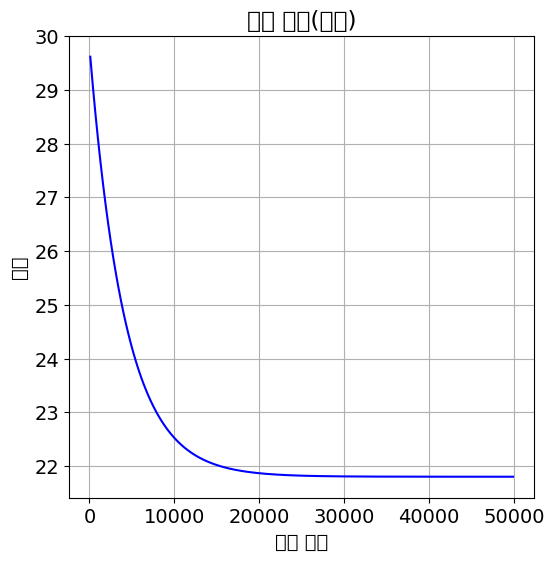

In [40]:
# 학습 곡선 출력(손실)
# 가장 처음 요소는 제외

plt.plot(history[1:,0], history[1:,1], 'b')
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.title('학습 곡선(손실)')
plt.show()

In [41]:
# 회귀 직선 산출

# x의 최솟값, 최댓값
xse = np.array((x.min(), x.max())).reshape(-1,1)
Xse = torch.tensor(xse).float()

with torch.no_grad():
  Yse = net(Xse)

print(Yse.numpy())

[[-2.2189]
 [45.2121]]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

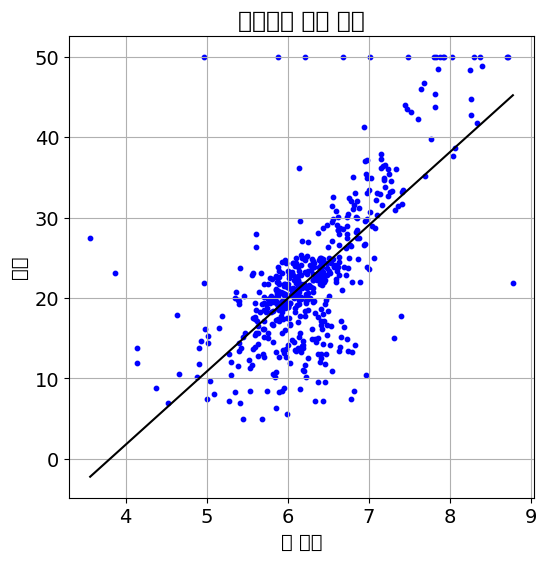

In [42]:
# 산포도와 회귀 직선 출력

plt.scatter(x, yt, s=10, c='b')
plt.xlabel('방 개수')
plt.ylabel('가격')
plt.plot(Xse.data, Yse.data, c='k')
plt.title('산포도와 회귀 직선')
plt.show()

## 5.10 중회귀 모델로 확장

In [43]:
# 열(LSTAT: 저소득자 비율) 추가

x_add = x_org[:,feature_names == 'LSTAT']
x2 = np.hstack((x, x_add))

# shape 표시
print(x2.shape)

# 입력 데이터 x 표시
print(x2[:5,:])

(506, 2)
[[6.575 4.98 ]
 [6.421 9.14 ]
 [7.185 4.03 ]
 [6.998 2.94 ]
 [7.147 5.33 ]]


In [44]:
# 입력 차원수=2

n_input = x2.shape[1]
print(n_input)

# 모델 인스턴스 생성
net = Net(n_input, n_output)

2


In [45]:
# 모델 안의 파라미터 확인
# predict.weight가 2차원으로 바뀜

for parameter in net.named_parameters():
    print(f'변수명: {parameter[0]}')
    print(f'변숫값: {parameter[1].data}')

변수명: l1.weight
변숫값: tensor([[1., 1.]])
변수명: l1.bias
변숫값: tensor([1.])


In [46]:
# 모델의 개요 표시

print(net)

Net(
  (l1): Linear(in_features=2, out_features=1, bias=True)
)


In [47]:
# 모델의 개요 표시

from torchinfo import summary
summary(net, (2,))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1]                       --
├─Linear: 1-1                            [1]                       3
Total params: 3
Trainable params: 3
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [48]:
# 입력 변수 x2를 텐서로 변환
# labels, labels1은 이전과 같음

inputs = torch.tensor(x2).float()

### 반복 계산

In [49]:
# 초기화 처리

# 학습률
lr = 0.01

# 인스턴스 생성(파라미터 값 초기화)
net = Net(n_input, n_output)

# 손실 함수：평균 제곱 오차
criterion = nn.MSELoss()

# 최적화 함수 : 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

# 반복 횟수
num_epochs = 50000

# 평가 결과 기록(손실 값만 기록)
history = np.zeros((0,2))

In [50]:
# 반복 계산 메인 루프

for epoch in range(num_epochs):

    # 경삿값 초기화
    optimizer.zero_grad()

    # 예측 계산
    outputs = net(inputs)

    # 오차 계산
    # "딥러닝을 위한 수학"에 나온 결과와 맞추기 위해 2로 나눈 값을 손실로 정의
    loss = criterion(outputs, labels1) / 2.0

    # 경사 계산
    loss.backward()

    # 파라미터 수정
    optimizer.step()

    # 100회 마다 도중 경과를 기록
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 112.06398
Epoch 100 loss: 3753837073642659568666615480320.00000
Epoch 200 loss: inf
Epoch 300 loss: nan
Epoch 400 loss: nan
Epoch 500 loss: nan
Epoch 600 loss: nan
Epoch 700 loss: nan
Epoch 800 loss: nan
Epoch 900 loss: nan
Epoch 1000 loss: nan
Epoch 1100 loss: nan
Epoch 1200 loss: nan
Epoch 1300 loss: nan
Epoch 1400 loss: nan
Epoch 1500 loss: nan
Epoch 1600 loss: nan
Epoch 1700 loss: nan
Epoch 1800 loss: nan
Epoch 1900 loss: nan
Epoch 2000 loss: nan
Epoch 2100 loss: nan
Epoch 2200 loss: nan
Epoch 2300 loss: nan
Epoch 2400 loss: nan
Epoch 2500 loss: nan
Epoch 2600 loss: nan
Epoch 2700 loss: nan
Epoch 2800 loss: nan
Epoch 2900 loss: nan
Epoch 3000 loss: nan
Epoch 3100 loss: nan
Epoch 3200 loss: nan
Epoch 3300 loss: nan
Epoch 3400 loss: nan
Epoch 3500 loss: nan
Epoch 3600 loss: nan
Epoch 3700 loss: nan
Epoch 3800 loss: nan
Epoch 3900 loss: nan
Epoch 4000 loss: nan
Epoch 4100 loss: nan
Epoch 4200 loss: nan
Epoch 4300 loss: nan
Epoch 4400 loss: nan
Epoch 4500 loss: nan
Epoch 

## 5.11 학습률의 변경

In [51]:
# 반복 횟수
#num_epochs = 50000
num_epochs = 2000

# 학습률
#l r = 0.01
lr = 0.001

# 모델 인스턴스 생성
net = Net(n_input, n_output)

# 손실 함수：평균 제곱 오차
criterion = nn.MSELoss()

# 최적화 함수 : 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

In [52]:
# 반복 계산 메인 루프

# 평가 결과 기록(손실 값만 기록)
history = np.zeros((0,2))

for epoch in range(num_epochs):

    # 경삿값 초기화
    optimizer.zero_grad()

    # 예측 계산
    outputs = net(inputs)

    # 오차 계산
    loss = criterion(outputs, labels1) / 2.0

    # 경사 계산
    loss.backward()

    # 파라미터 수정
    optimizer.step()

    # 100회 마다 도중 경과를 기록
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 112.06398
Epoch 100 loss: 25.35892
Epoch 200 loss: 16.39105
Epoch 300 loss: 15.40301
Epoch 400 loss: 15.29414
Epoch 500 loss: 15.28211
Epoch 600 loss: 15.28076
Epoch 700 loss: 15.28059
Epoch 800 loss: 15.28054
Epoch 900 loss: 15.28051
Epoch 1000 loss: 15.28048
Epoch 1100 loss: 15.28046
Epoch 1200 loss: 15.28043
Epoch 1300 loss: 15.28040
Epoch 1400 loss: 15.28037
Epoch 1500 loss: 15.28034
Epoch 1600 loss: 15.28031
Epoch 1700 loss: 15.28028
Epoch 1800 loss: 15.28026
Epoch 1900 loss: 15.28023


In [53]:
# 초기 손실값, 최종 손실값

print(f'초기 손실값: {history[0,1]:.5f}')
print(f'최종 손실값: {history[-1,1]:.5f}')

초기 손실값: 112.06398
최종 손실값: 15.28023


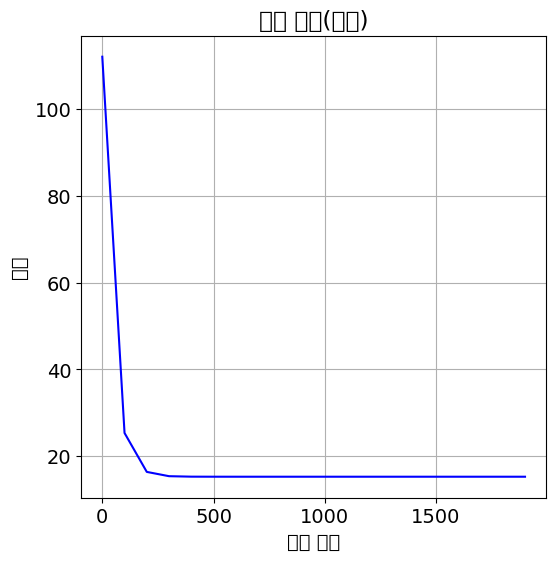

In [54]:
# 학습 곡선 출력(손실)

plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.title('학습 곡선(손실)')
plt.show()

In [57]:
#2입력 중회귀모델 작성
x_add = x_org[:,feature_names=='LSTAT']
x2 = np.hstack((x,x_add))
print(x2.shape)
print(x2[:5,:])

(506, 2)
[[6.575 4.98 ]
 [6.421 9.14 ]
 [7.185 4.03 ]
 [6.998 2.94 ]
 [7.147 5.33 ]]


In [61]:
n_input=x2.shape[1]
print(n_input)
net = Net(n_input,n_output)

2


In [63]:
for parameter in net.named_parameters():
  print(f'변수명:{parameter[0]}')
  print(f'변수값:{parameter[1].data}')


변수명:l1.weight
변수값:tensor([[1., 1.]])
변수명:l1.bias
변수값:tensor([1.])


In [65]:
print(net)

Net(
  (l1): Linear(in_features=2, out_features=1, bias=True)
)


In [66]:
from torchinfo import summary
summary(net,(2,))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1]                       --
├─Linear: 1-1                            [1]                       3
Total params: 3
Trainable params: 3
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [67]:
input=torch.tensor(x2).float()

In [68]:
if (epoch%100==0):
  history = np.vstack((history,np.array([epoch,loss.item()])))
  print(f'Epoch{epoch}loss:{loss.item():.5f}')

학습률의 변경

In [69]:
# 설정 초기값을 바꿔서 동일한 프로그램 실행
num_epochs = 2000
lr = 0.001
net = Net(n_input,n_output)
optimizer = optim.SGD(net.parameters(),lr = lr)

In [70]:
criterion = nn.MSELoss()

In [71]:
print(f'초기 손실값:{history[0,1]:.5f}')
print(f'최종 손실값:{history[-1,1]:.5f}')

초기 손실값:112.06398
최종 손실값:15.28023


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

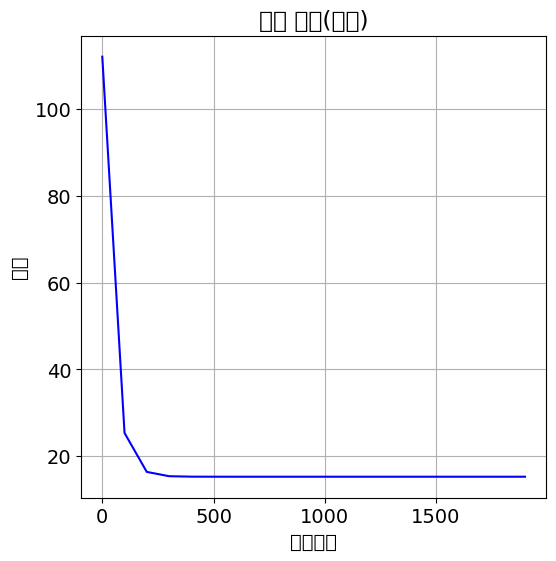

In [73]:
plt.plot(history[:,0],history[:,1],'b')
plt.xlabel('반복횟수')
plt.ylabel('손실')
plt.title('학습 곡선(손실)')
plt.show()